In [44]:
import numpy as np
import matplotlib.pyplot as plt
import copy

import evo
from evo.tools import plot
from evo.core import metrics
from evo.core.units import Unit
from evo.core import sync

import g2o_and_time_to_pose_data as gt2pd

In [45]:
robots = ['acl_jackal', 'acl_jackal2', 'sparkal1', 'sparkal2', 'hathor', 'thoth']
# g2o_dir = "/home/masonbp/results/segment_track/kmd_vio01/g2o"
# time_file = "/home/masonbp/results/segment_track/kmd_vio01/g2o/time.txt"
# g2o_file = "/home/masonbp/results/offline_rpgo/kmd_outdoors/vio01/result_5.g2o"
kmd_gt_csv = "/home/masonbp/data/kimera_multi/outdoor/gt"

# time_file = "/home/masonbp/results/segment_track/kmd_outdoor/00_vio/g2o/time.txt"
# g2o_file = "/home/masonbp/results/offline_rpgo/kmd_outdoors/01_drift/result.g2o"

# time_file = "/home/masonbp/results/offline_rpgo/kmd_outdoors/visual_lc/00_orig/pose_info.csv"
# g2o_file = "/home/masonbp/results/offline_rpgo/kmd_outdoors/visual_object_lc/01/result.g2o"

# time_file = "/home/masonbp/results/offline_rpgo/kmd_outdoors/visual_lc/00_orig/pose_info.csv"
# g2o_file = "/home/masonbp/results/offline_rpgo/kmd_outdoors/visual_lc/02_bigger_all_covar/result.g2o"

# pd_est, pd_gt = gt2pd.gt_csv_est_g2o_to_pose_data(g2o_file, time_file, {i: f"{kmd_gt_csv}/{robots[i]}.csv" for i in range(len(robots))})

In [46]:
# sparkal 1 sparkal 2

robots = ['sparkal1', 'sparkal2']

# time_file = "/home/masonbp/results/segment_track/kmd_outdoor/00_vio/g2o/time.txt"
# g2o_file = "/home/masonbp/results/offline_rpgo/kmd_outdoors/sparkal1_sparkal2_only/00_vio/result_odom_covar_2x.g2o"

# time_file = "/home/masonbp/results/offline_rpgo/kmd_outdoors/visual_lc/00_orig/pose_info.csv"
# g2o_file = "/home/masonbp/results/offline_rpgo/kmd_outdoors/sparkal1_sparkal2_only/visual_lc/result.g2o"

time_file = "/home/masonbp/results/offline_rpgo/kmd_outdoors/visual_lc/00_orig/pose_info.csv"
g2o_file = "/home/masonbp/results/offline_rpgo/kmd_outdoors/sparkal1_sparkal2_only/visual_object_lc/result.g2o"

pd_est, pd_gt = gt2pd.gt_csv_est_g2o_to_pose_data(g2o_file, time_file, {i+2: f"{kmd_gt_csv}/{robots[i]}.csv" for i in range(len(robots))})

0.0
0.0


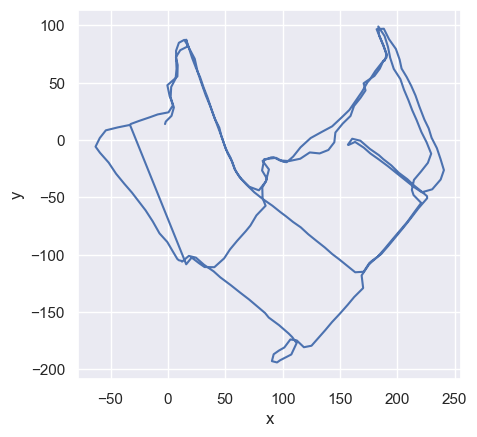

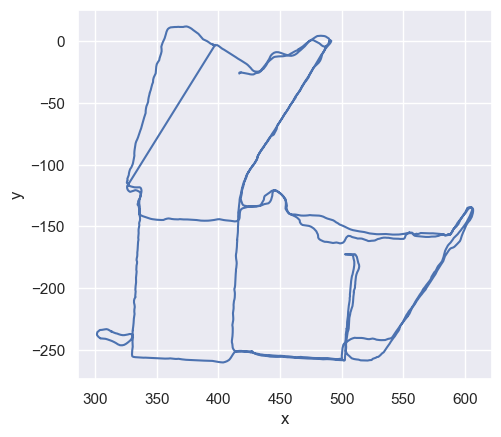

In [48]:
print(pd_est.t0 - pd_gt.t0)
print(pd_est.tf - pd_gt.tf)

pd_est.plot2d(t=pd_est.times[::30])
plt.show()

pd_gt.plot2d(t=pd_gt.times[::10])
plt.show()

In [49]:
traj_ref = pd_gt.to_evo()
traj_est = pd_est.to_evo()

max_diff = 0.01

traj_ref, traj_est = sync.associate_trajectories(traj_ref, traj_est, max_diff)

traj_est_aligned = copy.deepcopy(traj_est)
traj_est_aligned.align(traj_ref, correct_scale=False, correct_only_scale=False)

(array([[ 0.59090089,  0.8067149 , -0.0068711 ],
        [-0.80664516,  0.59067352, -0.0206973 ],
        [-0.01263824,  0.01777259,  0.99976218]]),
 array([409.96108901, -43.91128069,  -0.53913732]),
 1.0)

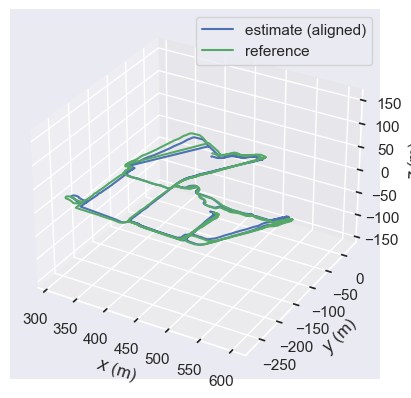

In [50]:
fig = plt.figure()
traj_by_label = {
    # "estimate (not aligned)": traj_est,
    "estimate (aligned)": traj_est_aligned,
    "reference": traj_ref
}
plot.trajectories(fig, traj_by_label, plot.PlotMode.xyz)
plt.show()

In [51]:
pose_relation = metrics.PoseRelation.translation_part
use_aligned_trajectories = True

In [52]:
if use_aligned_trajectories:
    data = (traj_ref, traj_est_aligned) 
else:
    data = (traj_ref, traj_est)

In [53]:
ape_metric = metrics.APE(pose_relation)
ape_metric.process_data(data)

In [54]:
ape_stat = ape_metric.get_statistic(metrics.StatisticsType.rmse)
print(ape_stat)

5.168472811944095


In [55]:
ape_stats = ape_metric.get_all_statistics()
for stat_key, stat_value in ape_stats.items():
    print(f"{stat_key}:\n{stat_value}")

rmse:
5.168472811944095
mean:
4.56029008360203
median:
4.10514994239963
std:
2.432460803632052
min:
1.1758373782368188
max:
11.646589026207916
sse:
41699.166595384064
